# Theil Sen Regression

Theil Sen regression involves fitting multiple regression models on subsets of the training data and combining the coefficients together in the end.

The scikit-learn provides an implementation via the TheilSenRegressor class.

The example below evaluates Theil Sen regression on the regression dataset with outliers, first evaluating the model with repeated cross-validation and then plotting the line of best fit.

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In C:\Users\DAVID\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\DAVID\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\DAVID\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\DAVID\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\DAVID\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mpl

## Importing the dataset

In [2]:
dataset = pd.read_csv('Data.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values
import pandas_profiling as pdp
report = pdp.ProfileReport(dataset, title='Pandas Profiling Report', style={'full_width':True})
report

In [3]:
dataset

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90
...,...,...,...,...,...
9563,16.65,49.69,1014.01,91.00,460.03
9564,13.19,39.18,1023.67,66.78,469.62
9565,31.32,74.33,1012.92,36.48,429.57
9566,24.48,69.45,1013.86,62.39,435.74


## Target Name

Target: PE
This distribution has skew 0.30650943542040243
This distribution has kurtosis -1.0485209686925077
Mean:  454.3650094063554 
Median:  451.54999999999995 
Mode:  468.8


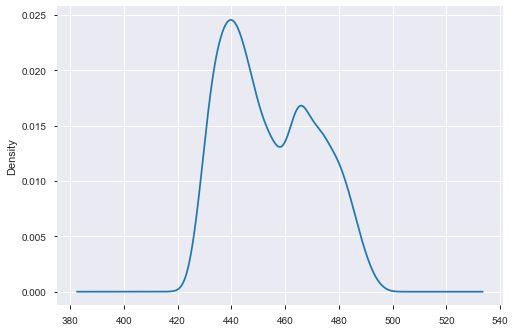

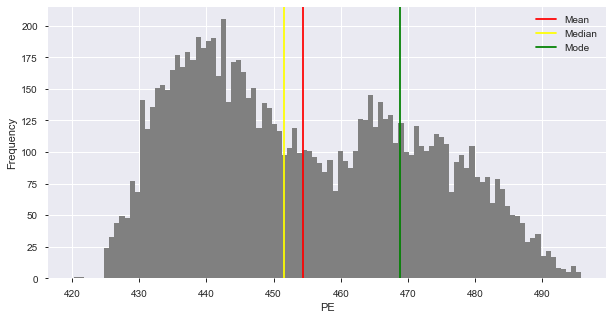

In [4]:
dataset.head(0)
index = dataset.head(0)
target = index.iloc[:,-1].name
print("Target:", target)

dataset[target].plot(kind = 'density')
print('This distribution has skew', dataset[target].skew())
print('This distribution has kurtosis', dataset[target].kurt())
mean=dataset[target].mean()
median=dataset[target].median()
mode=dataset[target].mode()

print('Mean: ',mean,'\nMedian: ',median,'\nMode: ',mode[0])
plt.figure(figsize=(10,5))
plt.hist(dataset[target],bins=100,color='grey')
plt.axvline(mean,color='red',label='Mean')
plt.axvline(median,color='yellow',label='Median')
plt.axvline(mode[0],color='green',label='Mode')
plt.xlabel(index.iloc[:,-1].name)
plt.ylabel('Frequency')
plt.legend()
plt.show()




## Splitting the dataset into the Training set and Test set

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## Training the Multiple Linear Regression model on the Training set

In [6]:
from sklearn.linear_model import TheilSenRegressor
regressor = TheilSenRegressor()
regressor.fit(X_train,y_train)

TheilSenRegressor(max_subpopulation=10000)

## Predicting the Test set results

In [7]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[431.16 431.23]
 [459.54 460.01]
 [464.43 461.14]
 ...
 [470.8  473.26]
 [441.77 438.  ]
 [462.16 463.28]]


In [8]:
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df

,Actual,Predicted
0,431.23,431.156480
1,460.01,459.543800
2,461.14,464.432079
3,445.90,448.568286
4,451.29,458.031496
...,...,...
1909,460.29,463.794628
1910,452.42,457.806264
1911,473.26,470.800889
1912,438.00,441.766437


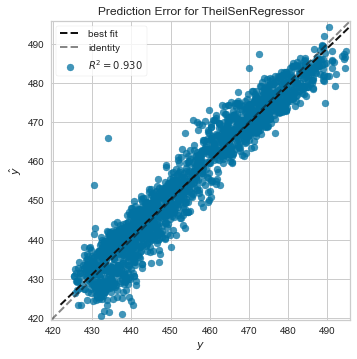

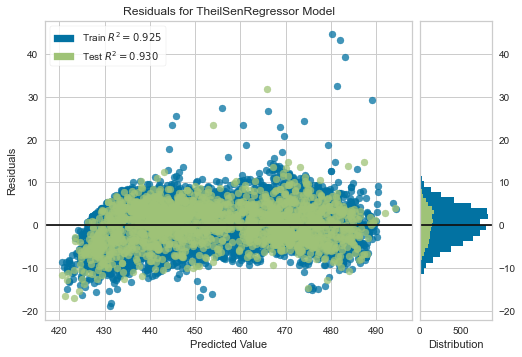

<AxesSubplot:title={'center':'Residuals for TheilSenRegressor Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [9]:
from yellowbrick.datasets import load_concrete
from yellowbrick.regressor import PredictionError


visualizer = PredictionError(regressor)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()                 # Finalize and render the figure

from yellowbrick.datasets import load_concrete
from yellowbrick.regressor import ResidualsPlot

visualizer = ResidualsPlot(regressor)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()                 # Finalize and render the figure

## Evaluating the Model Performance

### R2

In [10]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9303236781086067

### MAE

In [11]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_pred)

3.5996773998470424

## Bias-Variance Trade-off

In [12]:
from mlxtend.evaluate import bias_variance_decomp
# estimate bias and variance
avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(
        regressor, X_train, y_train, X_test, y_test, 
        loss='mse',
        random_seed=1)

print('Average expected loss: %.3f' % avg_expected_loss)
print('Average bias: %.3f' % avg_bias)
print('Average variance: %.3f' % avg_var)

Average expected loss: 20.790
Average bias: 20.347
Average variance: 0.443


## Making a single prediction

In [13]:
prediction = regressor.predict([[14,41,1024,73]])
print("Prediction : ",prediction)
stdev = np.sqrt(sum((regressor.predict(X_train) - y_train)**2) / (len(y_train) - 2))
print("Low Prediction: ", prediction - 1.96*stdev)
print("High Prediction: ", prediction + 1.96*stdev)

Prediction :  [469.27]
Low Prediction:  [460.12]
High Prediction:  [478.43]


# Evaluate Regression With Repeated K-Fold Cross-Validation

In [14]:
# Evaluate Regression With Repeated K-Fold Cross-Validation
from numpy import absolute
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
# define model
# define the evaluation procedure
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=0)
# evaluate the model and collect the scores
n_scores = cross_val_score(regressor, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# force the scores to be positive
n_scores = absolute(n_scores)
# summarize performance
print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

MAE: 3.647 (0.080)


## The importance of each feature

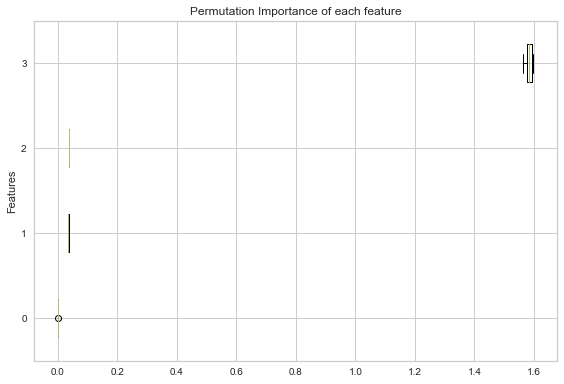

In [15]:
from sklearn.inspection import permutation_importance

result = permutation_importance(regressor, X, y, n_repeats=10, random_state=0,
                                n_jobs=-1)

fig, ax = plt.subplots()
sorted_idx = result.importances_mean.argsort()
ax.boxplot(result.importances[sorted_idx].T,
           vert=False, labels=range(X.shape[1]))
ax.set_title("Permutation Importance of each feature")
ax.set_ylabel("Features")
fig.tight_layout()
plt.show()

## Learning Curve

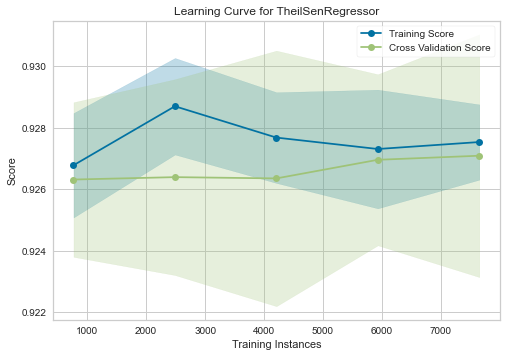

<AxesSubplot:title={'center':'Learning Curve for TheilSenRegressor'}, xlabel='Training Instances', ylabel='Score'>

In [16]:
from yellowbrick.datasets import load_energy
from yellowbrick.model_selection import LearningCurve

# Instantiate the regression model and visualizer
visualizer = LearningCurve(regressor, scoring='r2')

visualizer.fit(X, y)        # Fit the data to the visualizer
visualizer.show()           # Finalize and render the figure

## Compare robust regression algorithms on a regression dataset with outliers

>Linear 3.627 (0.078)
>Huber 3.968 (0.171)
>RANSAC 3.684 (0.086)
>TheilSen 3.650 (0.085)


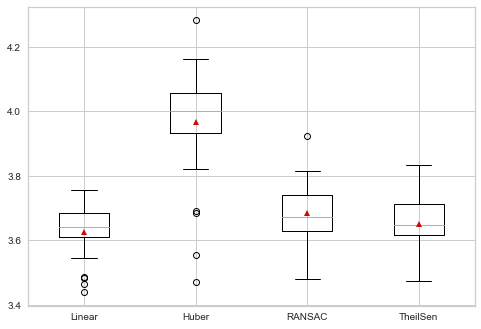

In [17]:
# compare robust regression algorithms on a regression dataset with outliers
from random import random
from random import randint
from random import seed
from numpy import mean
from numpy import std
from numpy import absolute
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import HuberRegressor
from sklearn.linear_model import RANSACRegressor
from sklearn.linear_model import TheilSenRegressor
from matplotlib import pyplot
 
# dictionary of model names and model objects
def get_models():
	models = dict()
	models['Linear'] = LinearRegression()
	models['Huber'] = HuberRegressor()
	models['RANSAC'] = RANSACRegressor()
	models['TheilSen'] = TheilSenRegressor()
	return models
 
# evaluate a model
def evalute_model(X, y, model, name):
	# define model evaluation method
	cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
	# evaluate model
	scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
	# force scores to be positive
	scores = absolute(scores)
	return scores
 
# retrieve models
models = get_models()
results = dict()
for name, model in models.items():
	# evaluate the model
	results[name] = evalute_model(X, y, model, name)
	# summarize progress
	print('>%s %.3f (%.3f)' % (name, mean(results[name]), std(results[name])))
# plot model performance for comparison
pyplot.boxplot(results.values(), labels=results.keys(), showmeans=True)
pyplot.show()